# Task3 Results: Multi-Objective TSP Experiments

This notebook demonstrates how to run the multi-objective TSP in two modes:

1. **Pareto mode**: Minimizing travel distance f1 and minimizing negative profit (equivalent to maximizing profit).
2. **Weighted mode**: Combining distance and profit into a single objective by a weight parameter \(\lambda\).

We will use the function `run_multiobjective_tsp(...)` from `task3_multiobjective.py`.

## 1. Environment Setup

We import the necessary libraries and adjust the Python path if needed.


In [1]:
import sys
import os

# If the notebook is not in the project root, ensure the module path is added
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import matplotlib.pyplot as plt

## 2. Import the Multi-Objective TSP Solver

We'll import the `run_multiobjective_tsp` function. The TSP file contain "XCOORD", "YCOORD", and "PROFIT" columns.

Let's define the path to `TSP.csv`.

In [2]:
from src.tasks.task3_multiobjective import run_multiobjective_tsp

tsp_file = os.path.abspath(os.path.join(module_path, "data", "TSP.csv"))
print("Using TSP file:", tsp_file)

Using TSP file: C:\Robbie\1 Program\1-2 COMP6707 ADVANCED COMPUTATIONAL INTELLIGENCE\COMP6707-Project\COMP6707_Project_24037513R\data\TSP.csv


## 3. Weighted Single-Objective Approach

First, we'll test the weighted approach, setting a certain \(\lambda\) to balance between total distance and profit. 

Running weighted single-objective with lambda=0.1, pop_size=100, max_gen=500.


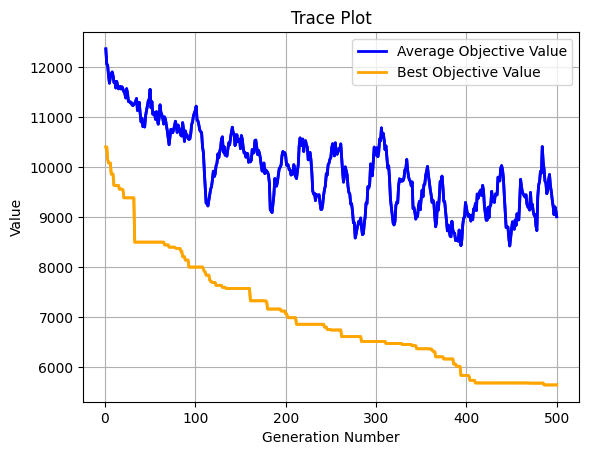

Execution time: 8.156137228012085 s
Evaluation number: 49501
The best objective value is: 5650.41141339034
The best variables are: 
41	25	69	58	23	92	66	55	79	18	35	50	24	21	51	52	62	74	59	15	77	19	72	68	6	10	42	33	70	85	17	29	60	28	2	0	37	30	4	12	3	22	61	87	90	14	94	48	98	84	49	20	39	38	93	31	71	86	63	99	97	65	43	82	1	54	95	73	7	47	56	26	44	64	96	27	80	89	40	45	32	76	46	91	88	78	75	5	53	67	83	8	9	16	11	57	36	34	81	13	
Weighted mode best objective values: [5650.41141339]
Best route (first 20 customers): [41 25 69 58 23 92 66 55 79 18 35 50 24 21 51 52 62 74 59 15] ...
Length of route: 100


In [3]:
lambda_test = 0.1
pop_size = 100
max_gen = 500

print(f"Running weighted single-objective with lambda={lambda_test}, pop_size={pop_size}, max_gen={max_gen}.")
res_weighted = run_multiobjective_tsp(tsp_file, 
                                      mode="weighted", 
                                      lambda_weight=lambda_test,
                                      pop_size=pop_size, 
                                      max_gen=max_gen)

best_route_w = res_weighted["route"]
best_obj_w = res_weighted["ObjV"]
print("Weighted mode best objective values:", best_obj_w)
print("Best route (first 20 customers):", best_route_w[:20], "...")
print(f"Length of route: {len(best_route_w)}")

### 3.1 Visualizing the Best Route (Weighted Mode)

We can plot the route in the coordinate plane.

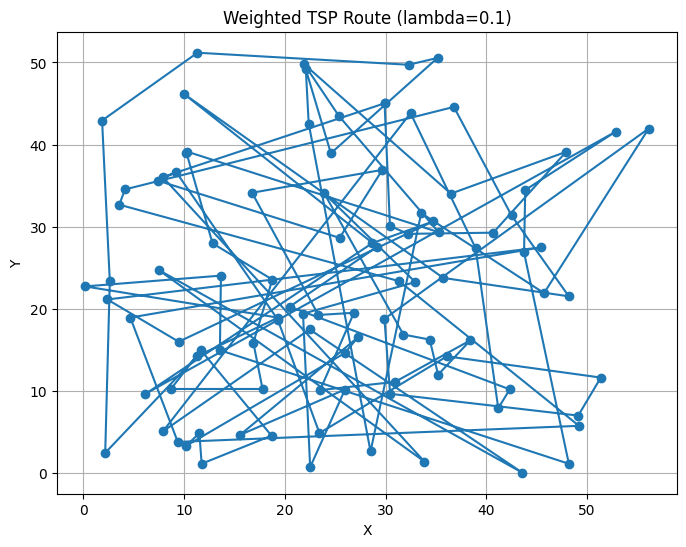

In [4]:
from src.utils.visualization import plot_tsp_route

coords_w = res_weighted["problem"].coords
plot_tsp_route(coords_w, best_route_w, 
               title=f"Weighted TSP Route (lambda={lambda_test})", 
               show=True)

If needed, we can dissect the single objective value:  
$$f = \text{Distance} - \lambda \times \text{TotalProfit}$$

---

## 4. Multi-Objective Pareto Optimization

Now let's switch `mode="pareto"` to run a true multi-objective GA (NSGA-II). We'll observe the Pareto front in the $$(f_1, f_2)$$

### 4.1 Single Run in Pareto Mode

Running pareto multi-objective with pop_size=100, max_gen=500.


C:\Users\User\anaconda3\envs\py39_env\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


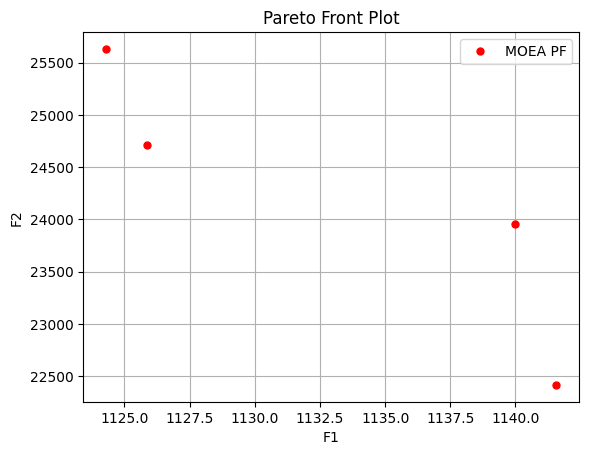

Execution time: 8.587755918502808 s
Evaluation number: 50000
The number of non-dominated solutions is: 4
hv: 0.02033
spacing: 370.51477
Number of non-dominated solutions: 4
Some of the solutions' objective values (f1, f2):


array([[ 1139.9946498 , 23959.59102048],
       [ 1141.57241132, 22415.43873232],
       [ 1124.27448395, 25631.97434514],
       [ 1125.8694917 , 24713.47666421]])

In [5]:
pop_size_mo = 100
max_gen_mo = 500

print(f"Running pareto multi-objective with pop_size={pop_size_mo}, max_gen={max_gen_mo}.")
res_pareto = run_multiobjective_tsp(tsp_file, 
                                    mode="pareto",
                                    lambda_weight=None,
                                    pop_size=pop_size_mo, 
                                    max_gen=max_gen_mo)

pareto_routes = res_pareto["route"]
pareto_objv = res_pareto["ObjV"]
print("Number of non-dominated solutions:", pareto_objv.shape[0])
print("Some of the solutions' objective values (f1, f2):")
pareto_objv[:10]

### 4.2 Pareto Front Visualization

We can plot the obtained front using the `plot_pareto_front` function (only the first 2 objectives).

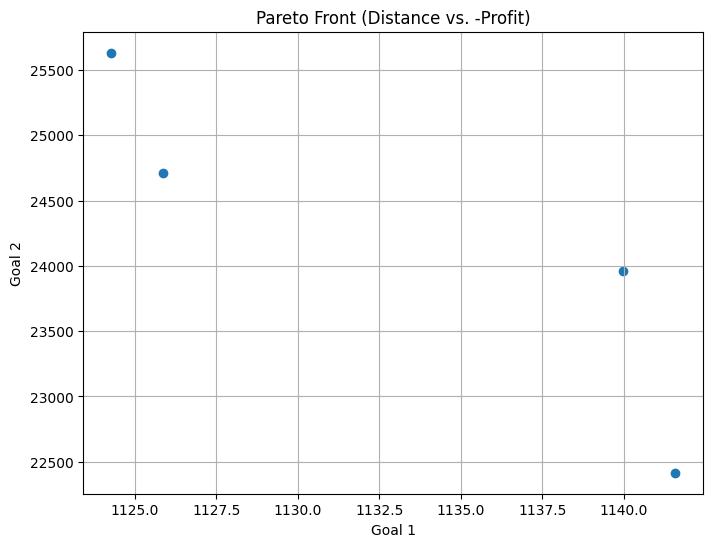

In [6]:
from src.utils.visualization import plot_pareto_front
plot_pareto_front(pareto_objv, title="Pareto Front (Distance vs. -Profit)", show=True)

Notice:
- The x-axis is typically \(f_1\) (distance),
- The y-axis is \(f_2\) (negative profit).

**Lower** is better for both, but since \(f_2 = - \text{profit}\), we want the profit to be higher (thus making \(f_2\) more negative).  

The solutions near the "bottom-left" corner might reflect a good compromise of short distance and high profit.

---

## 5. Sensitivity to \lambda\) for Weighted Approach

If we want to see how solutions shift with different \(\lambda\), we can try multiple values:

Running weighted single-objective, lambda=0.01


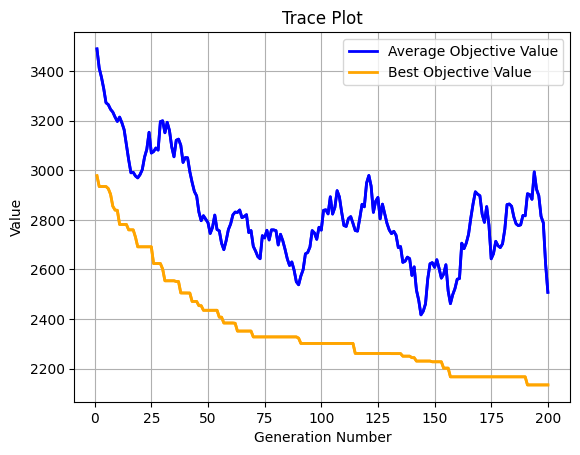

Execution time: 1.652777910232544 s
Evaluation number: 9801
The best objective value is: 2134.5172599454604
The best variables are: 
41	70	25	55	57	0	92	64	9	19	44	53	24	77	40	54	43	42	61	65	68	30	22	18	38	32	69	51	11	59	74	96	1	76	50	26	15	89	27	2	29	10	37	66	91	4	8	17	83	87	28	45	98	20	31	35	75	3	79	47	56	16	84	23	6	48	81	36	39	58	78	34	97	82	13	21	33	49	73	94	93	90	14	85	88	99	52	72	95	62	67	46	71	86	12	7	63	5	60	80	
Running weighted single-objective, lambda=0.1


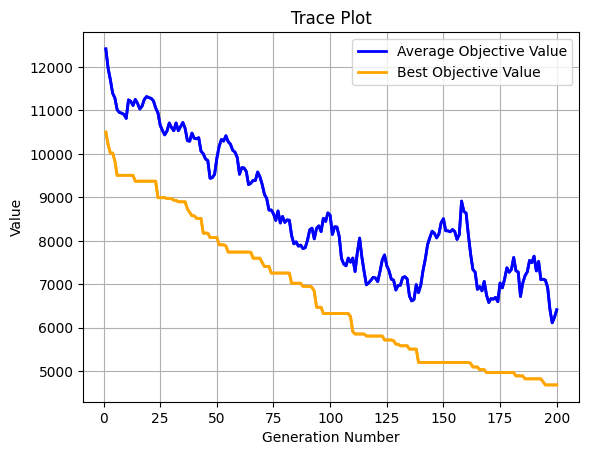

Execution time: 1.692253828048706 s
Evaluation number: 9801
The best objective value is: 4684.9983428496835
The best variables are: 
22	18	37	77	40	11	26	50	54	28	2	74	39	85	72	42	43	95	92	20	32	53	64	79	33	17	98	9	78	31	38	91	16	76	46	97	34	75	69	44	58	96	68	52	61	66	82	57	1	89	62	27	3	63	35	24	19	83	8	48	36	73	45	14	23	49	80	84	25	12	7	88	51	21	55	86	41	47	90	87	60	6	29	81	10	67	70	4	56	5	99	13	71	0	65	93	30	15	59	94	
Running weighted single-objective, lambda=0.5


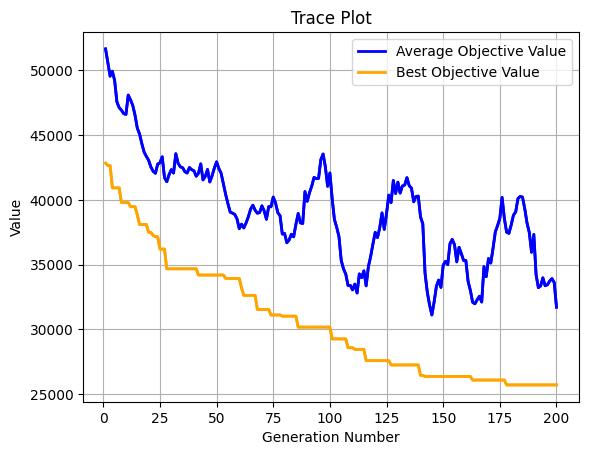

Execution time: 1.7297143936157227 s
Evaluation number: 9801
The best objective value is: 25717.00858263044
The best variables are: 
47	23	5	30	38	21	61	89	77	26	65	43	90	7	32	37	51	82	72	62	58	25	69	9	88	16	71	46	54	96	59	15	52	95	68	11	67	27	12	28	29	13	3	93	55	99	97	42	74	19	17	39	57	81	73	78	2	10	83	8	40	60	14	45	53	44	86	35	41	56	98	0	79	92	64	50	66	33	85	24	76	1	4	80	91	20	63	94	34	18	70	49	75	84	48	22	6	31	87	36	
Running weighted single-objective, lambda=1.0


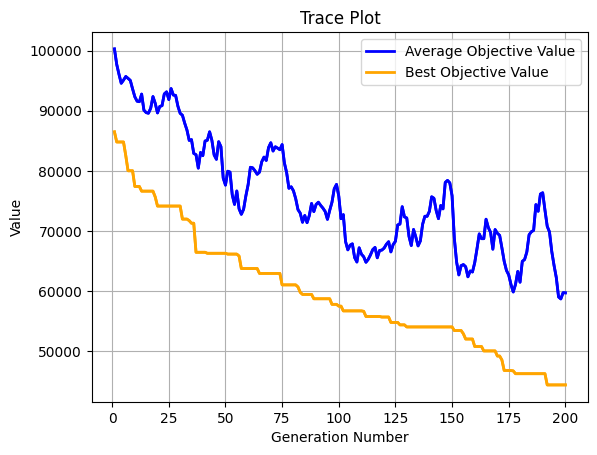

Execution time: 1.7845189571380615 s
Evaluation number: 9801
The best objective value is: 44333.61292431375
The best variables are: 
12	42	37	33	57	45	47	88	92	69	79	38	41	66	16	70	13	34	51	62	22	43	68	65	52	11	77	15	35	18	30	97	21	85	78	23	56	36	94	6	59	74	39	87	75	98	61	27	71	91	58	29	32	17	49	80	9	7	20	63	50	54	24	28	96	19	84	31	8	83	90	2	86	3	99	46	76	93	0	81	73	48	64	44	1	89	55	82	14	72	40	26	67	10	60	25	4	5	95	53	


In [7]:
lambda_list = [0.01, 0.1, 0.5, 1.0]
weighted_records = []

for lam in lambda_list:
    print(f"Running weighted single-objective, lambda={lam}")
    res_temp = run_multiobjective_tsp(tsp_file, mode="weighted", lambda_weight=lam,
                                      pop_size=50, max_gen=200)
    # We can store the final objective and route
    weighted_records.append({
        "lambda": lam,
        "best_obj": res_temp["ObjV"],
        "route": res_temp["route"]
    })


We can see how the best objective value changes as \(\lambda\) changes. 

In [8]:
for rec in weighted_records:
    print(f"lambda={rec['lambda']}, best objective value={rec['best_obj']}")

lambda=0.01, best objective value=[2134.51725995]
lambda=0.1, best objective value=[4684.99834285]
lambda=0.5, best objective value=[25717.00858263]
lambda=1.0, best objective value=[44333.61292431]


If desired, we can attempt to compute or approximate the distance and profit separately for each final route to see how changing \(\lambda\) influences the trade-off.

## 6. Observations

1. **Weighted mode** provides a single trade-off solution. Varying \(\lambda\) can shift emphasis between distance and profit.
2. **Pareto mode** yields a **set** of non-dominated solutions. We can pick from this set according to real-world preferences.